In [17]:
import pandas as pd
import os

# Define the base path for the data files
base_path = 'round-4-island-data-bottle'

# Define column names based on the data structure
# column_names = [
#     'timestamp',
#     'bid_price',
#     'ask_price',
#     'transport_fee',
#     'export_tariff',
#     'import_tariff',
#     'sugar_price',
#     'sunlight_index'
# ]

# Load observations from each day with proper column names
day1_obs = pd.read_csv(os.path.join(base_path, 'observations_round_4_day_1.csv'), 
                       )
day2_obs = pd.read_csv(os.path.join(base_path, 'observations_round_4_day_2.csv'), 
                       )
day3_obs = pd.read_csv(os.path.join(base_path, 'observations_round_4_day_3.csv'), 
                       )

day1_obs['day'] = 1
day2_obs['day'] = 2
day3_obs['day'] = 3

# Adjust timestamps for day 2 and day 3 to create continuous timeline
day2_obs['timestamp'] = day2_obs['timestamp'] + day1_obs['timestamp'].max() + 100
day3_obs['timestamp'] = day3_obs['timestamp'] + day2_obs['timestamp'].max() + 100



# Combine all observations
all_observations = pd.concat([day1_obs, day2_obs, day3_obs], ignore_index=True)

# Display basic information about the combined dataset
print(f"Total number of observations: {len(all_observations)}")
print("\nFirst few rows of the combined dataset:")
print(all_observations.head())

# Display basic statistics
print("\nBasic statistics of the combined dataset:")
print(all_observations.describe())

# Save the combined dataset
all_observations.to_csv('combined_observations.csv', index=False)
print("\nCombined dataset saved to 'combined_observations.csv'")

Total number of observations: 30000

First few rows of the combined dataset:
   timestamp  bidPrice  askPrice  transportFees  exportTariff  importTariff  \
0          0     627.0     628.5            1.0           9.0          -3.0   
1        100     630.0     631.5            1.0           9.0          -3.0   
2        200     630.0     631.5            1.0           9.0          -3.0   
3        300     632.0     633.5            1.0           9.0          -3.0   
4        400     630.5     632.0            1.0           9.0          -3.0   

   sugarPrice  sunlightIndex  day  
0  200.000000          60.00    1  
1  200.098445          60.00    1  
2  200.103915          60.00    1  
3  200.352462          60.01    1  
4  200.201545          60.01    1  

Basic statistics of the combined dataset:
          timestamp      bidPrice      askPrice  transportFees  exportTariff  \
count  3.000000e+04  30000.000000  30000.000000   30000.000000  30000.000000   
mean   1.499950e+06    662.88

In [18]:
all_observations["midPrice"] = ((all_observations["bidPrice"].astype(float) + all_observations["askPrice"].astype(float)) / 2).astype(float)


all_observations.head(5)

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day,midPrice
0,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,1,627.75
1,100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,1,630.75
2,200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,1,630.75
3,300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,1,632.75
4,400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,1,631.25


Text(0.5, 1.0, 'Sunlight Index and Sugar Price Over Time (Days 1-3)')

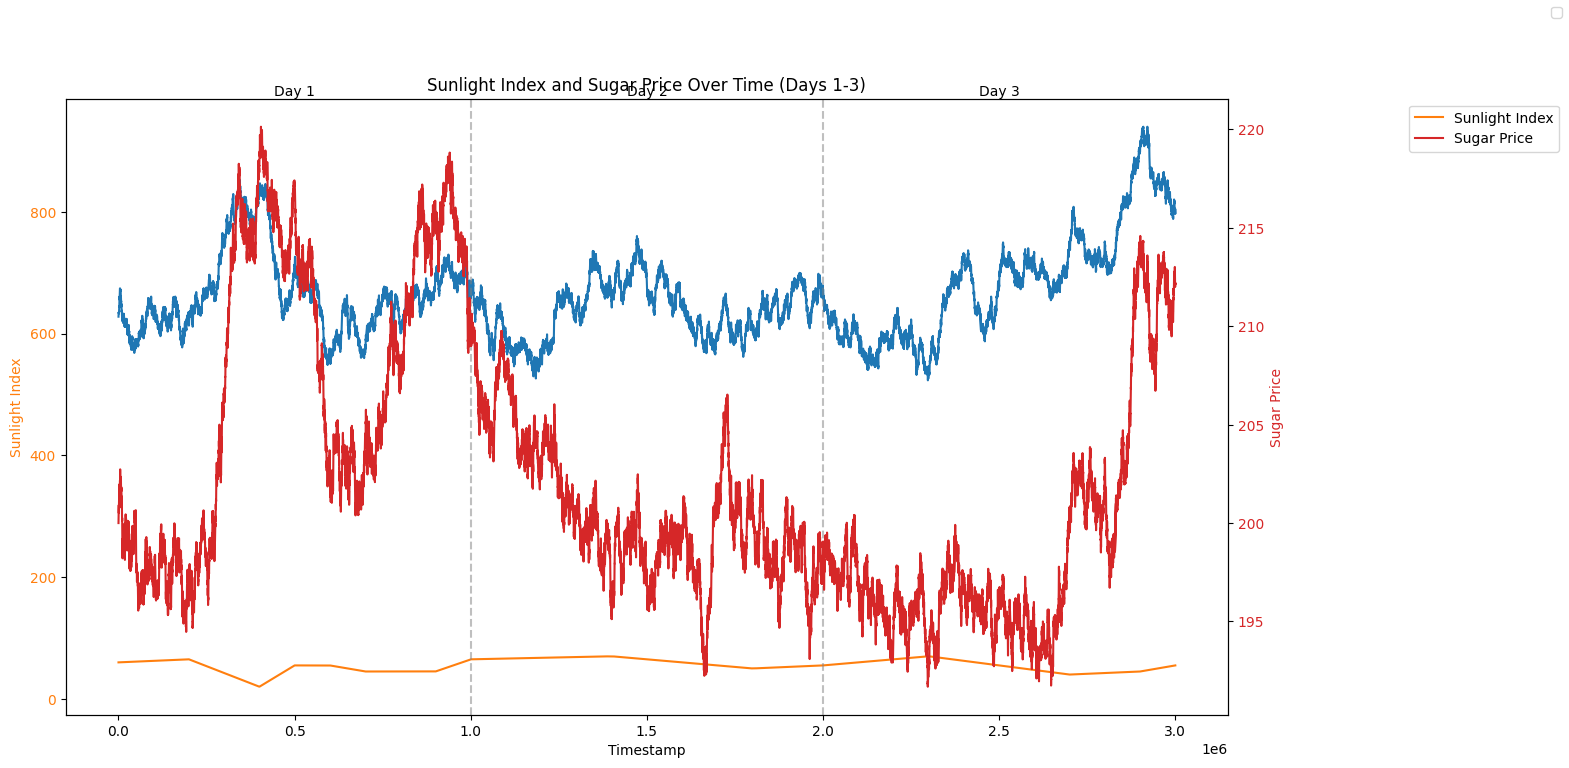

In [23]:

import matplotlib.pyplot as plt


# Convert timestamp to numeric, skipping the header row
all_observations = all_observations[all_observations['timestamp'] != 'timestamp']
all_observations['timestamp'] = pd.to_numeric(all_observations['timestamp'])
all_observations['bid_price'] = pd.to_numeric(all_observations['bidPrice'])
all_observations['ask_price'] = pd.to_numeric(all_observations['askPrice'])
all_observations['transport_fee'] = pd.to_numeric(all_observations['transportFees'])
all_observations['export_tariff'] = pd.to_numeric(all_observations['exportTariff'])
all_observations['import_tariff'] = pd.to_numeric(all_observations['importTariff'])
all_observations['sugar_price'] = pd.to_numeric(all_observations['sugarPrice'])
all_observations['sunlight_index'] = pd.to_numeric(all_observations['sunlightIndex'])

# Calculate mid price
all_observations['mid_price'] = (all_observations['bid_price'] + all_observations['ask_price']) / 2

# Create a figure with multiple subplots
fig, ax1 = plt.subplots(figsize=(15, 8))
# Plot midPrice on primary y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Mid Price', color=color1)
fig.legend(['Mid Price'])
line1 = ax1.plot(all_observations['timestamp'], all_observations['midPrice'], color=color1, label='Mid Price')
ax1.tick_params(axis='y', labelcolor=color1)



color1 = 'tab:orange'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Sunlight Index', color=color1)
line1 = ax1.plot(all_observations['timestamp'], all_observations['sunlightIndex'], color=color1, label='Sunlight Index')
ax1.tick_params(axis='y', labelcolor=color1)

# Create second y-axis for sugar price
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Sugar Price', color=color2)
line2 = ax2.plot(all_observations['timestamp'], all_observations['sugarPrice'], color=color2, label='Sugar Price')
ax2.tick_params(axis='y', labelcolor=color2)

# Add vertical lines to separate days
day1_end = day1_obs['timestamp'].max()
day2_end = day2_obs['timestamp'].max()
ax1.axvline(x=day1_end, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=day2_end, color='gray', linestyle='--', alpha=0.5)
ax1.text(day1_end/2, ax1.get_ylim()[1], 'Day 1', ha='center', va='bottom')
ax1.text((day1_end + day2_end)/2, ax1.get_ylim()[1], 'Day 2', ha='center', va='bottom')
ax1.text((day2_end + all_observations['timestamp'].max())/2, ax1.get_ylim()[1], 'Day 3', ha='center', va='bottom')

# Combine all lines for legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.15, 1))

# Add title
plt.title('Sunlight Index and Sugar Price Over Time (Days 1-3)')


In [ ]:
def implied_bid_ask_macaroons(
        buffer = 0.1    #! play around with this buffer to see if it improves performance
        return (
            observation.bidPrice - observation.transportFees - observation.exportTariff - buffer,
            observation.askPrice + observation.transportFees + observation.importTariff
        )

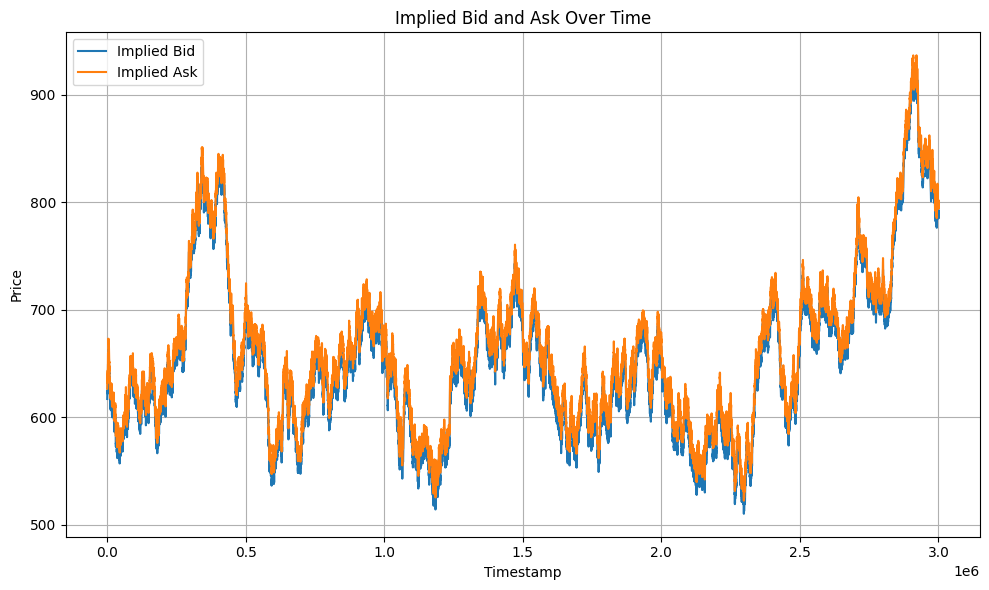

In [24]:
df = pd.read_csv('combined_observations.csv')

# 2. Compute implied bid and ask
buffer = 0.1  # tweak as needed
df['implied_bid'] = df['bidPrice'] - df['transportFees'] - df['exportTariff'] - buffer
df['implied_ask'] = df['askPrice'] + df['transportFees'] + df['importTariff']

# 3. Plot both series over time
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['implied_bid'], label='Implied Bid')
plt.plot(df['timestamp'], df['implied_ask'], label='Implied Ask')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Implied Bid and Ask Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()








In [3]:
import pandas as pd
mydfs = []

csv_files = ["/Users/shankunzru/Desktop/prosp3/prosperity-imc25/rounds/round4/eda/r4_data_in_a_bottle/round-4-island-data-bottle/prices_round_4_day_1.csv", "/Users/shankunzru/Desktop/prosp3/prosperity-imc25/rounds/round4/eda/r4_data_in_a_bottle/round-4-island-data-bottle/prices_round_4_day_2.csv", "/Users/shankunzru/Desktop/prosp3/prosperity-imc25/rounds/round4/eda/r4_data_in_a_bottle/round-4-island-data-bottle/prices_round_4_day_3.csv"]
for file in csv_files:
    df = pd.read_csv(file)
    mydfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined_prices.csv', index=False)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [ ]:

# 1. Load the full dataset
#    Replace 'full_data.csv' with the path to your actual file


df = pd.read_csv('/Users/shankunzru/Desktop/prosp3/prosperity-imc25/rounds/round4/eda/r4_data_in_a_bottle/round-4-island-data-bottle/combined_prices.csv', sep=';')

# 2. Filter only the MAGNIFICENT_MACARONS rows
mac = df[df['product'] == 'MAGNIFICENT_MACARONS']

# 3. Plot best bid and best ask over time
plt.figure(figsize=(10, 6))
plt.plot(mac['timestamp'], mac['bid_price_1'], label='Best Bid', marker='o', linestyle='-')
plt.plot(mac['timestamp'], mac['ask_price_1'], label='Best Ask', marker='o', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('MAGNIFICENT_MACARONS: Best Bid & Ask Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()